In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from PIL import Image
import os
import cv2
from tqdm import tqdm

from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import tensorflow as tf

In [2]:
source_path_train = './dataset/Training/'
source_path_test ='./dataset/Testing/'
categories = os.listdir(source_path_train)
for category in categories:
    os.listdir(os.path.join(source_path_train,category))
    
classes = {'glioma_tumor':0, 'meningioma_tumor':1, 'no_tumor':2, 'pituitary_tumor':3 }
classes   

{'glioma_tumor': 0, 'meningioma_tumor': 1, 'no_tumor': 2, 'pituitary_tumor': 3}

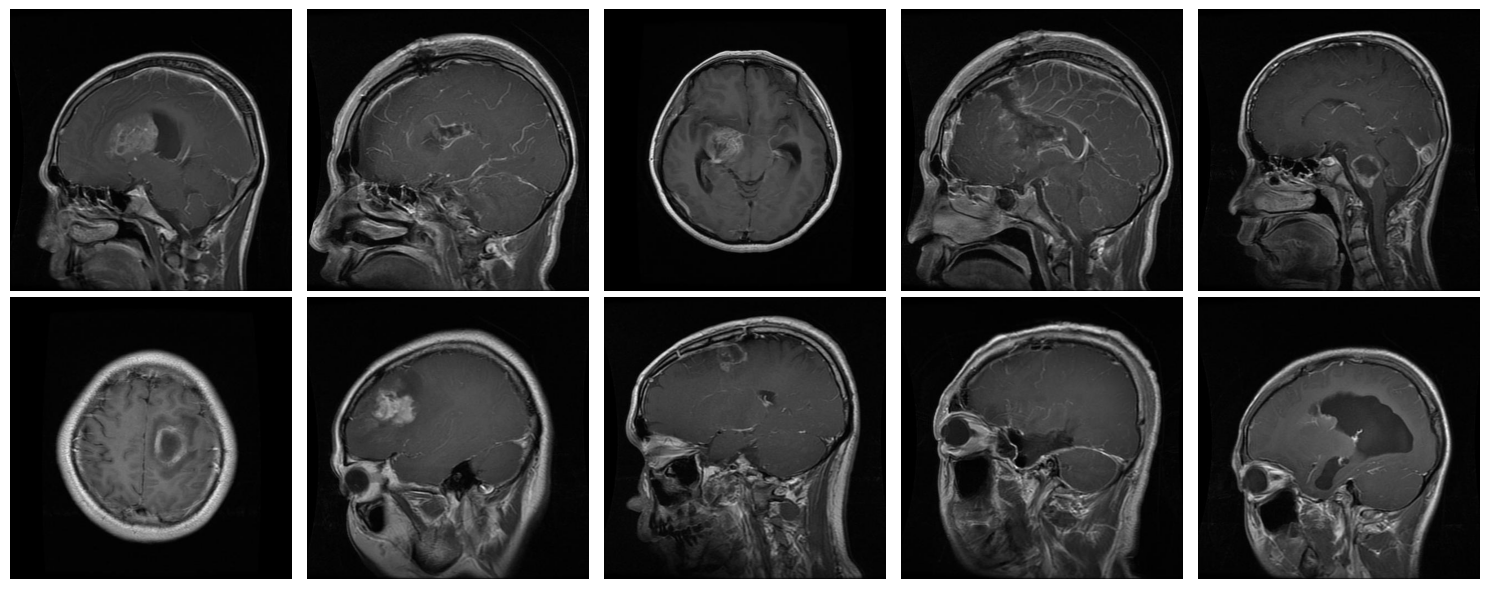

In [3]:
path_image= './dataset/Training/glioma_tumor/'
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(15, 6))
random_indices = random.sample(range(1, 101), 10)

for i, idx in enumerate(random_indices, 1):
    file_path = os.path.join(path_image, f'gg ({idx}).jpg')
    image = Image.open(file_path)
    subplot_row = (i - 1) // 5
    subplot_col = (i - 1) % 5
    axes[subplot_row, subplot_col].imshow(image)
    axes[subplot_row, subplot_col].axis('off')  
plt.tight_layout()   
plt.show()

In [4]:
classes = {'glioma_tumor':0, 'meningioma_tumor':1, 'no_tumor':2, 'pituitary_tumor':3 }


In [5]:
X = []
Y = []
for cls in classes:
    pth = source_path_train + '//' + cls
    for j in os.listdir(pth):
        img = cv2.imread(pth + '//' + j, 0)
        img = cv2.resize(img, (200, 200))
        X.append(img)
        Y.append(classes[cls])
for cls in classes:
    pth = source_path_test + '//' + cls
    for j in os.listdir(pth):
        img = cv2.imread(pth + '//' + j, 0)
        img = cv2.resize(img, (200, 200))
        X.append(img)
        Y.append(classes[cls])
X = np.array(X)
Y = np.array(Y)
pd.Series(Y).value_counts()

1    937
0    926
3    901
2    500
Name: count, dtype: int64

In [6]:
np.unique(Y)


array([0, 1, 2, 3])

In [7]:
X.shape


(3264, 200, 200)

In [8]:
X_updated = X.reshape(len(X), -1)
X_updated.shape

(3264, 40000)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_updated, Y, random_state = 10, test_size = 0.20)

In [10]:
X_train_updated = X_train.reshape(len(X_train), -1)
X_test_updated = X_test.reshape(len(X_test), -1)
X_train_updated.shape ,X_test_updated.shape

((2611, 40000), (653, 40000))

In [11]:
print(X_train_updated.max(), X_train_updated.min())
print(X_test_updated.max(), X_test_updated.min())
X_train_updated = X_train_updated/255
X_test_updated = X_test_updated/255
print(X_train_updated.max(), X_train_updated.min())
print(X_test_updated.max(), X_test_updated.min())

255 0
255 0
1.0 0.0
1.0 0.0


In [12]:
def read_data(path1,path2,image_size = 150):
    X = []
    y = []
    labels = os.listdir(path1)
    for label in labels:
        for image in tqdm(os.listdir(path1 + label)):
            img = cv2.imread(os.path.join(path1 + label,image))
            img = cv2.resize(img,(image_size, image_size))
            X.append(img)
            y.append(label)
    for label in labels:
        for image in tqdm(os.listdir(path2 + label)):
            img = cv2.imread(os.path.join(path2 + label,image))
            img = cv2.resize(img,(image_size, image_size))
            X.append(img)
            y.append(label)
            
    return np.array(X), np.array(y)
X_train, y_train = read_data(source_path_train,source_path_test)
X_train, y_train = shuffle(X_train, y_train, random_state=45)
X_test, y_test= read_data(source_path_test ,source_path_test )
X_test, y_test = shuffle(X_test, y_test, random_state=45)

100%|██████████| 74/74 [00:00<00:00, 259.65it/s]


In [13]:
print(f"X Train shape is --> {X_train.shape}\ny Train shape is --> {y_train.shape}\nX Test shape is --> {X_test.shape}\ny Test shape is --> {y_test.shape}")

X Train shape is --> (3264, 150, 150, 3)
y Train shape is --> (3264,)
X Test shape is --> (788, 150, 150, 3)
y Test shape is --> (788,)


In [14]:
labels = os.listdir(source_path_train)
y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))
y_train=y_train_new
y_train = tf.keras.utils.to_categorical(y_train)
labels = os.listdir(source_path_test)
y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))
y_test=y_test_new
y_test = tf.keras.utils.to_categorical(y_test)

In [15]:
print(f"X Train shape is --> {X_train.shape}\ny Train shape is --> {y_train.shape}\nX Test shape is --> {X_test.shape}\ny Test shape is --> {y_test.shape}")

X Train shape is --> (3264, 150, 150, 3)
y Train shape is --> (3264, 4)
X Test shape is --> (788, 150, 150, 3)
y Test shape is --> (788, 4)


In [16]:
np.unique(y_train)

array([0., 1.], dtype=float32)

In [17]:
np.unique(y_test)

array([0., 1.], dtype=float32)

In [18]:
print(X_train.max(), X_train.min())
print(X_test.max(), X_test.min())
X_train = X_train/255
X_test = X_test/255
print(X_train.max(), X_train.min())
print(X_test.max(), X_test.min())

255 0
255 0
1.0 0.0
1.0 0.0


In [19]:
def create_model():
  
    model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(4, activation="softmax")
    ])
   


  

    return model

In [20]:
X_train = tf.constant(X_train)
y_train = tf.constant(y_train)

In [22]:
model = create_model()
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=10, validation_split=0.1)

92/92 [==============================] - 31s 332ms/step - loss: 0.4456 - accuracy: 0.5560 - val_loss: 0.3427 - val_accuracy: 0.6758


In [23]:
model.save('../BACKEND/modelo.h5')